FORWARD KINMATICS FOR SUPPLYBOT

In [ ]:
from sympy import symbols,sin,cos,Matrix,pprint
import math
import sympy as sym
theta,theta1,theta2,theta3,theta4,theta5,theta6 = symbols('theta,theta1,theta2,theta3,theta4,theta5,theta6')
alpha = symbols('alpha')
a,d = symbols('a,d')

#Generalized homogeneous matrix equation
print("Generalised Homogeneous Transformation in DH:")
A = Matrix(([cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta)],
            [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)],
            [0, sin(alpha), cos(alpha), d],
            [0, 0, 0, 1]))
pprint(A)
print("\n ---------------------------------------------------------------- \n")

T1 = A.subs([(theta,theta1),(alpha,0),(a,0),(d,0.3330)])
print("T1: \n")
pprint(T1)
print("\n")

T2 = A.subs([(theta,theta2),(alpha,math.radians(90)),(a,0),(d,0)])
print("T2: \n")
pprint(T2)
print("\n")

T3 = A.subs([(theta,theta3),(alpha,0),(a,-0.42500),(d,0)])
print("T3: \n")
pprint(T3)
print("\n")

T4 = A.subs([(theta,theta4),(alpha,0),(a,-0.39225),(d,0.10915)])
print("T4: \n")
pprint(T4)
print("\n")

T5 = A.subs([(theta,theta5),(alpha,math.radians(90)),(a,0),(d,0.09465)])
print("T5: \n")
pprint(T5)
print("\n")

T6 = A.subs([(theta,theta6),(alpha,math.radians(-90)),(a,0),(d,0.0823)])
print("T6: \n")
pprint(T6)
print("\n")

print("\n ---------------------------------------------------------------- \n")

print("Final Transformation matrix:")
#Calculation for final transformation matrix
T = T1*T2*T3*T4*T5*T6 
pprint(T)


Generalised Homogeneous Transformation in DH:
⎡cos(θ)  -sin(θ)⋅cos(α)  sin(α)⋅sin(θ)   a⋅cos(θ)⎤
⎢                                                ⎥
⎢sin(θ)  cos(α)⋅cos(θ)   -sin(α)⋅cos(θ)  a⋅sin(θ)⎥
⎢                                                ⎥
⎢  0         sin(α)          cos(α)         d    ⎥
⎢                                                ⎥
⎣  0           0               0            1    ⎦

 ---------------------------------------------------------------- 

T1: 

⎡cos(θ₁)  -sin(θ₁)  0    0  ⎤
⎢                           ⎥
⎢sin(θ₁)  cos(θ₁)   0    0  ⎥
⎢                           ⎥
⎢   0        0      1  0.333⎥
⎢                           ⎥
⎣   0        0      0    1  ⎦


T2: 

⎡cos(θ₂)  -6.12323399573677e-17⋅sin(θ₂)      1.0⋅sin(θ₂)       0⎤
⎢                                                               ⎥
⎢sin(θ₂)  6.12323399573677e-17⋅cos(θ₂)       -1.0⋅cos(θ₂)      0⎥
⎢                                                               ⎥
⎢   0                  1.0              

FORWARD KINMATICS VALIDATION

In [ ]:
#FORWARD KINEMATICS VALIDATION

#First test of forward kinematics validation
print(" Initial Position of end effector with all joint angles Zero:\n")
T1 = A.subs({theta: math.radians(0), alpha: math.radians(0), d: 0.089159, a: 0})
T2 = A.subs({theta: math.radians(0), alpha: math.radians(90), d: 0, a: 0})
T3 = A.subs({theta: math.radians(0), alpha: math.radians(0), d: 0, a: -0.4250})
T4=A.subs({theta: math.radians(0), alpha: math.radians(0), d: 0.10915,a:-0.39225})
T5 = A.subs({theta: math.radians(0), alpha: math.radians(90), d: 0.09465, a: 0})
T6 = A.subs({theta: math.radians(0), alpha: math.radians(-90), d: 0.0823, a: 0})

Final_T = T1*T2*T3*T4*T5*T6
pprint(Final_T)
Final_T.row_del(-1)
print("\n")
print("End Effector Position:")
print("\n")
pprint(Final_T[:,-1])

print("\n ---------------------------------------------------------------- \n")

#Second test of forward kinematics validation
print("Rotating Joint angles by [90,90,-45,90,45,0]:\n")
T1 = A.subs({theta: math.radians(90), alpha: math.radians(0), d: 0.089159,a: 0})
T2 = A.subs({theta: math.radians(90), alpha: math.radians(90), d: 0, a: 0})
T3 = A.subs({theta: math.radians(-45), alpha: math.radians(0), d: 0, a: -0.4250})
T4=A.subs({theta: math.radians(90), alpha: math.radians(0), d: 0.10915,a:-0.39225})
T5 = A.subs({theta: math.radians(45), alpha: math.radians(90), d: 0.09465, a: 0})
T6 = A.subs({theta: math.radians(0), alpha: math.radians(-90), d: 0.0823, a: 0})

Final_T = T1*T2*T3*T4*T5*T6
pprint(Final_T)
Final_T.row_del(-1)

print("End Effector Position:")
print("\n")
pprint(Final_T[:,-1])

print("\n ---------------------------------------------------------------- \n")

#Third test of forward kinematics validation
print("Rotating Joint angles by [-90,90,-45,90,45,0]:\n")
T1 = A.subs({theta: math.radians(-90), alpha: math.radians(0), d: 0.089159, a:0})
T2 = A.subs({theta: math.radians(90), alpha: math.radians(90), d: 0, a: 0})
T3 = A.subs({theta: math.radians(-45), alpha: math.radians(0), d: 0, a: -0.4250})
T4=A.subs({theta: math.radians(90), alpha: math.radians(0), d: 0.10915,a:-0.39225})
T5 = A.subs({theta: math.radians(-45), alpha: math.radians(90), d: 0.09465, a: 0})
T6 = A.subs({theta: math.radians(0), alpha: math.radians(-90), d: 0.0823, a: 0})

Final_T = T1*T2*T3*T4*T5*T6
pprint(Final_T)
Final_T.row_del(-1)

print("End Effector Position:")
print("\n")
pprint(Final_T[:,-1])

print("\n ---------------------------------------------------------------- \n")


 Initial Position of end effector with all joint angles Zero:

⎡1           0                     0            -0.81725⎤
⎢                                                       ⎥
⎢0  6.12323399573677e-17          -1.0          -0.2038 ⎥
⎢                                                       ⎥
⎢0          1.0           6.12323399573677e-17  0.006859⎥
⎢                                                       ⎥
⎣0           0                     0               1    ⎦


End Effector Position:


⎡-0.81725⎤
⎢        ⎥
⎢-0.2038 ⎥
⎢        ⎥
⎣0.006859⎦

 ---------------------------------------------------------------- 

Rotating Joint angles by [90,90,-45,90,45,0]:

⎡          0                     1.0           1.22464679914735e-16  0.4955830
⎢                                                                             
⎢-6.12323399573677e-17  -1.22464679914735e-16          1.0                0.20
⎢                                                                             
⎢         1.0    

WORKSPACE

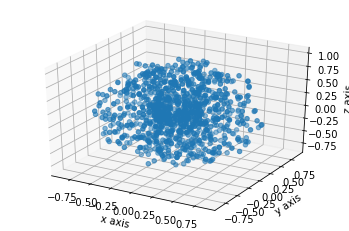

In [ ]:
#WORKSPACE VISUALIZATION
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

l = []

#Definition of transformation matrix
A = Matrix(([cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta)],
            [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)],
            [0, sin(alpha), cos(alpha), d],
            [0, 0, 0, 1]))

#For loop to obtain the final transformation matrix data arrays
for k in range(1000):
  T1 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(0), d: 0.089159, a: 0})
  T2 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(90), d: 0, a: 0})
  T3 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(0), d: 0, a: -0.42500})
  T4 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(0), d: 0.10915, a: -0.39225})
  T5 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(90), d: 0.09465, a: 0})
  T6 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(-90), d: 0.0823, a: 0})

  T = T1*T2*T3*T4*T5*T6
  
  l.append(T)

x = []
y = []
z = []

#For loop to obtain the final 3D plot for workspace
for i in range(1000):
  k = l[i]
  x.append(k[0,3])
  y.append(k[1,3])
  z.append(k[2,3])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_arr = np.array(x,dtype=np.float32)
y_arr = np.array(y,dtype=np.float32)
z_arr = np.array(z,dtype=np.float32)

ax.scatter3D(x_arr,y_arr,z_arr)

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")



plt.show()